In [1]:
import os
os.chdir('../..')

In [2]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
from examples.industrial.data import create_datasets
from eXNN.InnerNeuralViz import VisualizeNetSpace

In [3]:
# download repository https://github.com/Med-AI-Lab/industrial-task-casting-defects
# change ind_repo to the root of the downloaded repository
ind_repo = Path('../industrial-task-casting-defects')

In [4]:
# prepare data
_, test_ds = create_datasets(ind_repo / 'casting_512x512')
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

data, labels = [], []
for batch in test_dl:
    data.append(batch[0])
    labels.append(batch[1])
data = torch.cat(data, dim=0)
labels = torch.cat(labels, dim=0)

In [5]:
# prepare model
device = torch.device('cuda:0')
model = torch.load(ind_repo / 'trained_model.pt', map_location=device)
model = model.eval()

In [6]:
# do visualization
layers = ['layer1', 'layer2', 'layer3', 'layer4', 'avgpool', 'fc']
res = VisualizeNetSpace(model, 'umap', data.to(device), layers, labels=labels, chunk_size=128)

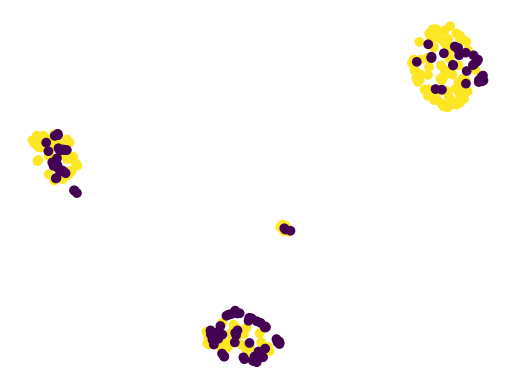

In [7]:
# in input data classes are mixed and can't be separated
res['input']

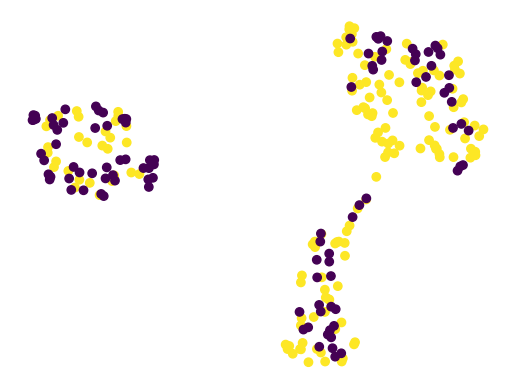

In [8]:
# after first two layers not really better
res['layer2']

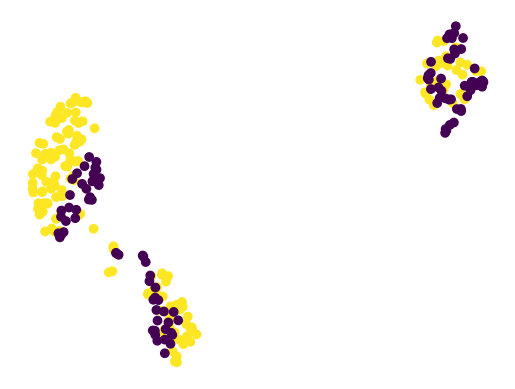

In [9]:
# next layers doesn't really change much
res['layer3']

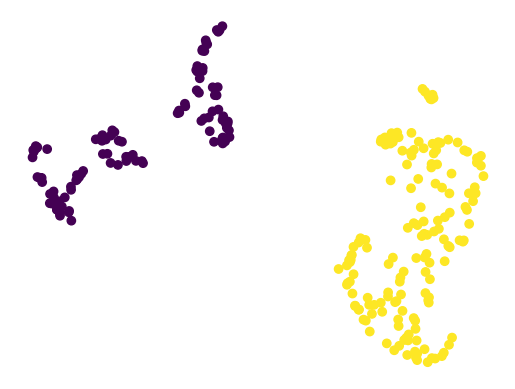

In [10]:
# final conv block separates the data
res['layer4']